# The Battle of The Neighborhoods

#### Picking up a location in San Francisco to open a new coffee shop

### Introduction

#### The idea of this study is to help people who is planning to open a new coffee shop in San Francisco. San Francisco is a very big city, in order to choose the right location, it will need to analyze the data of crime rate, the population and the income of each neighborhood. 

In [42]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests 
from pandas.io.json import json_normalize
print('Library loaded')

Library loaded


### Load the dataset

In [43]:
#Load the dataset of the neighborhood of San Francisco and the zipcode
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, 'lxml')
table = soup.find_all('table')
df = pd.read_html(str(table))
df = pd.DataFrame(df[4])
df.columns = df.iloc[0]
df.sort_values(by = ['Population (Census 2000)'], inplace = True)
df = df.iloc[1:-1, :-1]
df_sf = df
df_sf

,Zip Code,Neighborhood
3,94107,Potrero Hill
17,94127,St. Francis Wood/Miraloma/West Portal
15,94123,Marina
2,94103,South of Market
19,94132,Lake Merced
20,94133,North Beach/Chinatown
18,94131,Twin Peaks-Glen Park
1,94102,Hayes Valley/Tenderloin/North of Market
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown


In [44]:
#Adding latitude and longitude to the dataset
!pip install uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode = True)

latitude = []
longitude = []

for index, row in df_sf.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get('lat'))
    longitude.append(zipcode.get('lng'))
    
df_sf['Latitude'] = latitude
df_sf['Longitude'] = longitude

df_sf.dropna(inplace = True)
df_sf

You should consider upgrading via the '/Users/xinyu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


,Zip Code,Neighborhood,Latitude,Longitude
3,94107,Potrero Hill,37.77,-122.39
17,94127,St. Francis Wood/Miraloma/West Portal,37.73,-122.46
15,94123,Marina,37.80,-122.44
2,94103,South of Market,37.78,-122.41
19,94132,Lake Merced,37.72,-122.48
20,94133,North Beach/Chinatown,37.80,-122.44
18,94131,Twin Peaks-Glen Park,37.75,-122.44
1,94102,Hayes Valley/Tenderloin/North of Market,37.78,-122.42
8,94114,Castro/Noe Valley,37.76,-122.44
9,94115,Western Addition/Japantown,37.79,-122.44


In [45]:
df_sf.shape

(20, 4)

#### Create the map

In [46]:
#Create the map of San Francisco 
latitude = 37.7792808
longitude = -122.4192363

sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, label in zip(df_sf['Latitude'], df_sf['Longitude'], df_sf['Neighborhood']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng],
    radium = 4,
    popup = label,
    color = 'green',
    fill = True,
    fill_color = '#c99051',
    fill_opacity = 0.6,
    parse_html = False).add_to(sf_map)
    
sf_map

### Explore the Neighborhood of San Francisco

In [47]:
#Load the dataset of income of San Francisco 
sf_income = pd.read_csv('SF Household Income by Zip.csv')
sf_income_sort = sf_income.sort_values(by='Avg. Income/H/hold\t', ascending = False)
sf_income_sort.head()

,Unnamed: 0,Zipcode,Latitude,Longitude,City,Population,Avg. Income/H/hold\t
0,1,94127,37.737,-122.457,"San Francisco, California","20,624",95313.0
1,2,94105,37.789,-122.395,"San Francisco, California","2,058",88976.0
2,3,94123,37.800,-122.437,"San Francisco, California","22,903",84710.0
3,4,94130,37.821,-122.370,"San Francisco, California","1,453",80959.0
4,5,94131,37.747,-122.443,"San Francisco, California","27,897",76044.0


/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


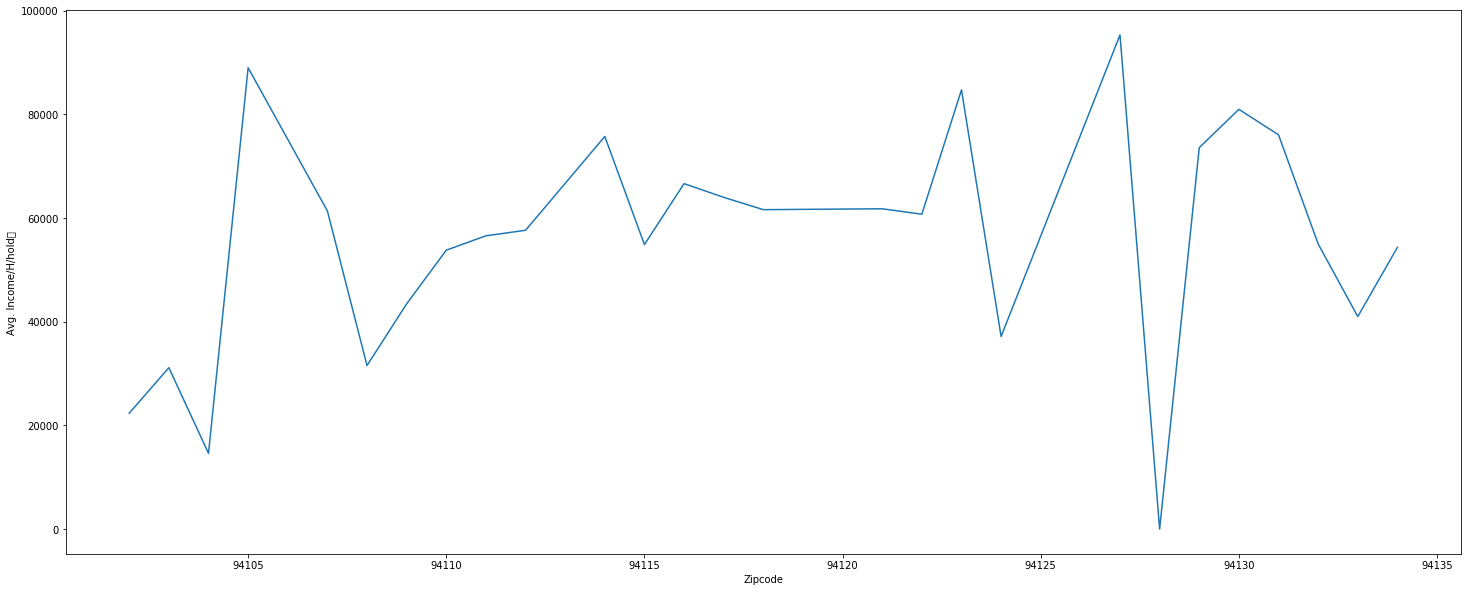

In [48]:
#Create the graph from the dataset of income
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize = (25, 10))
income_rank = sns.lineplot(x = 'Zipcode', y = 'Avg. Income/H/hold\t', data = sf_income_sort)

In [49]:
sf_crime = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
sf_crime.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/05/12 05:45:00 PM,2020/05/12,17:45,2020,Tuesday,2020/05/13 09:46:00 AM,92897328150,928973,206082743,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/19 09:00:00 PM,2020/05/19,21:00,2020,Tuesday,2020/05/20 05:43:00 PM,92899306244,928993,206082709,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/16 06:00:00 PM,2020/05/16,18:00,2020,Saturday,2020/05/16 10:26:00 PM,92902428150,929024,206083296,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/03/30 12:00:00 AM,2020/03/30,00:00,2020,Monday,2020/05/04 11:47:00 AM,92905305073,929053,206062193,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/02/03 02:45:00 PM,2020/02/03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881675000,898816,200085557,200342870.0,...,41.0,10.0,8.0,16.0,NaN,NaN,NaN,NaN,NaN,2.0


In [50]:
sf_crime = sf_crime[['Incident Date', 'Incident ID', 'Analysis Neighborhood', 
                     'Supervisor District', 'Latitude', 'Longitude']]
sf_crime.head()

,Incident Date,Incident ID,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,2020/05/12,928973,NaN,NaN,NaN,NaN
1,2020/05/19,928993,NaN,NaN,NaN,NaN
2,2020/05/16,929024,NaN,NaN,NaN,NaN
3,2020/03/30,929053,NaN,NaN,NaN,NaN
4,2020/02/03,898816,Lakeshore,7.0,37.72695,-122.476039


In [51]:
sf_crime_rank = sf_crime['Analysis Neighborhood'].value_counts(ascending = True)
sf_crime_rank

McLaren Park                        359
Seacliff                            403
Lincoln Park                        431
Presidio                            810
Treasure Island                    1167
Glen Park                          1813
Twin Peaks                         1824
Presidio Heights                   2153
Noe Valley                         3409
Oceanview/Merced/Ingleside         3624
Japantown                          3633
Golden Gate Park                   3753
Portola                            3932
Visitacion Valley                  3990
Lakeshore                          4191
Inner Sunset                       4215
Lone Mountain/USF                  4342
Inner Richmond                     4668
Outer Mission                      4935
Potrero Hill                       5761
Excelsior                          5793
Haight Ashbury                     5941
Mission Bay                        6063
Pacific Heights                    6087
Bernal Heights                     6230


#### Analyze the Neighborhood 

In [52]:
#Input the client_id and client_secret
CLIENT_ID = 'KDDF1LVBCDSLAYKQJ4VCJQ0B0WXKD1ZSTIJIIPUWOEIE3SRS'
CLIENT_SECRET = 'XC50DJNCCFQFS4554XEF0DVVUUFIU5GMNNUVROWIHFQBO3LE'
VERSION = '20200805'
LIMIT = 10000

print('Your credentails: ')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails: 
CLIENT_ID: KDDF1LVBCDSLAYKQJ4VCJQ0B0WXKD1ZSTIJIIPUWOEIE3SRS
CLIENT_SECRET: XC50DJNCCFQFS4554XEF0DVVUUFIU5GMNNUVROWIHFQBO3LE


In [53]:
#Use foursquare API to load the dataset
def getNearbyVenues(names, latitudes, longitudes, radius = 600):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # GET request for venues
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [54]:
sf_venues = getNearbyVenues(names = df_sf['Neighborhood'], 
                            latitudes = df_sf['Latitude'], 
                            longitudes = df_sf['Longitude'])

In [55]:
sf_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Potrero Hill,37.77,-122.39,SPARK Social SF,37.770762,-122.391689,Street Food Gathering
1,Potrero Hill,37.77,-122.39,Stagecoach Greens,37.770867,-122.390261,Mini Golf
2,Potrero Hill,37.77,-122.39,Spro Coffeelab,37.770835,-122.391400,Coffee Shop
3,Potrero Hill,37.77,-122.39,SFFSoccer Mission Bay Field,37.770886,-122.392197,Soccer Field
4,Potrero Hill,37.77,-122.39,CorePower Yoga,37.772415,-122.391539,Yoga Studio
...,...,...,...,...,...,...,...
1201,Inner Mission/Bernal Heights,37.75,-122.42,The Pizza Shop,37.752501,-122.414310,Pizza Place
1202,Inner Mission/Bernal Heights,37.75,-122.42,Chilli Cha Cha,37.752458,-122.415652,Thai Restaurant
1203,Inner Mission/Bernal Heights,37.75,-122.42,Esperpento,37.755356,-122.420693,Tapas Restaurant
1204,Inner Mission/Bernal Heights,37.75,-122.42,Taqueria Guadalajara,37.752460,-122.415001,Mexican Restaurant


In [56]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,5,5,5,5,5,5
Castro/Noe Valley,81,81,81,81,81,81
Haight-Ashbury,56,56,56,56,56,56
Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
Ingelside-Excelsior/Crocker-Amazon,58,58,58,58,58,58
Inner Mission/Bernal Heights,69,69,69,69,69,69
Inner Richmond,79,79,79,79,79,79
Lake Merced,28,28,28,28,28,28
Marina,82,82,82,82,82,82


In [57]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 229 uniques categories.


In [58]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix = '', prefix_sep = '')
sf_onehot['Neighborhood'] = sf_venues['Neighborhood']
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]
sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Potrero Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Potrero Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potrero Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Potrero Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Potrero Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
sf_onehot.shape

(1206, 230)

In [60]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bayview-Hunters Point,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,Castro/Noe Valley,0.0,0.000000,0.012346,0.0,0.0,0.012346,0.0,0.00,0.012346,...,0.012346,0.000000,0.0,0.0,0.000000,0.024691,0.012346,0.0,0.0,0.024691
2,Haight-Ashbury,0.0,0.017857,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.017857,0.017857,0.0,0.0,0.000000,0.017857,0.000000,0.0,0.0,0.017857
3,Hayes Valley/Tenderloin/North of Market,0.0,0.010000,0.000000,0.0,0.0,0.000000,0.0,0.01,0.000000,...,0.000000,0.020000,0.0,0.0,0.040000,0.020000,0.010000,0.0,0.0,0.010000
4,Ingelside-Excelsior/Crocker-Amazon,0.0,0.000000,0.000000,0.0,0.0,0.017241,0.0,0.00,0.000000,...,0.000000,0.000000,0.0,0.0,0.051724,0.000000,0.000000,0.0,0.0,0.000000


In [61]:
num_top_venues = 10
for hood in sf_grouped['Neighborhood']:
    print('----' + hood + '----')
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bayview-Hunters Point----
             Venue  freq
0  Motorcycle Shop   0.2
1   Ice Cream Shop   0.2
2      Coffee Shop   0.2
3             Park   0.2
4    Moving Target   0.2
5     Optical Shop   0.0
6           Museum   0.0
7     Music School   0.0
8      Music Store   0.0
9      Music Venue   0.0


----Castro/Noe Valley----
               Venue  freq
0            Gay Bar  0.10
1               Park  0.06
2        Coffee Shop  0.04
3    Thai Restaurant  0.04
4  Convenience Store  0.04
5        Yoga Studio  0.02
6     Scenic Lookout  0.02
7     Clothing Store  0.02
8      Grocery Store  0.02
9               Hill  0.02


----Haight-Ashbury----
            Venue  freq
0     Coffee Shop  0.07
1  Ice Cream Shop  0.05
2    Tennis Court  0.04
3        Boutique  0.04
4     Record Shop  0.04
5  Scenic Lookout  0.04
6            Park  0.04
7   Grocery Store  0.04
8      Playground  0.02
9     Event Space  0.02


----Hayes Valley/Tenderloin/North of Market----
                   Venue  freq


In [62]:
def return_most_common_venues(row, num_top_venues):
    row_category = row.iloc[1:]
    row_category_sorted = row_category.sort_values(ascending = False)
    
    return row_category_sorted.index.values[0:  num_top_venues]

In [63]:
num_top = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']

for ind in np.arange(num_top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))
neighborhood_venue_sort = pd.DataFrame(columns = columns)
neighborhood_venue_sort['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhood_venue_sort.iloc[ind, 1: ] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top)

neighborhood_venue_sort.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Coffee Shop,Ice Cream Shop,Motorcycle Shop,Moving Target,Park,Event Space,Fountain,Food Truck,Food & Drink Shop,Flower Shop
1,Castro/Noe Valley,Gay Bar,Park,Thai Restaurant,Convenience Store,Coffee Shop,Clothing Store,Playground,Scenic Lookout,Hill,Grocery Store
2,Haight-Ashbury,Coffee Shop,Ice Cream Shop,Tennis Court,Grocery Store,Boutique,Record Shop,Scenic Lookout,Park,Burrito Place,Liquor Store
3,Hayes Valley/Tenderloin/North of Market,Theater,Coffee Shop,Vietnamese Restaurant,Cocktail Bar,Sandwich Place,French Restaurant,Dessert Shop,Thai Restaurant,Boutique,Concert Hall
4,Ingelside-Excelsior/Crocker-Amazon,Pizza Place,Mexican Restaurant,Bakery,Vietnamese Restaurant,Latin American Restaurant,Pharmacy,Coffee Shop,Sandwich Place,Bus Station,Bar


In [64]:
neighborhood_venue_sort.shape

(19, 11)

### Cluster Neighborhood

In [65]:
from sklearn.cluster import KMeans

kcluster = 5
sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters = kcluster, random_state = 0).fit(sf_grouped_clustering)
kmeans.labels_[0:10]


array([2, 0, 0, 0, 3, 0, 0, 3, 0, 0], dtype=int32)

In [66]:
neighborhood_venue_sort.insert(0, 'Cluster Labels', kmeans.labels_)
sf_merged = df_sf
sf_merged = sf_merged.join(neighborhood_venue_sort.set_index('Neighborhood'), on = 'Neighborhood')

sf_merged.head()


,Zip Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,94107,Potrero Hill,37.77,-122.39,0.0,Food Truck,Gym,Park,Coffee Shop,Pharmacy,Gym / Fitness Center,Café,Boat or Ferry,Street Food Gathering,Pizza Place
17,94127,St. Francis Wood/Miraloma/West Portal,37.73,-122.46,4.0,Chinese Restaurant,Yoga Studio,Café,Pizza Place,Park,Pool Hall,Fountain,Fried Chicken Joint,Bus Line,Massage Studio
15,94123,Marina,37.80,-122.44,0.0,Italian Restaurant,Wine Bar,Cosmetics Shop,French Restaurant,Gym / Fitness Center,Mexican Restaurant,Playground,Electronics Store,Diner,Deli / Bodega
2,94103,South of Market,37.78,-122.41,0.0,Coffee Shop,Bakery,Marijuana Dispensary,Sandwich Place,Vietnamese Restaurant,Cosmetics Shop,Music Venue,Beer Bar,Theater,Mediterranean Restaurant
19,94132,Lake Merced,37.72,-122.48,3.0,Pizza Place,Café,Coffee Shop,Snack Place,Mexican Restaurant,Sandwich Place,Rental Car Location,Gym / Fitness Center,Burger Joint,Cocktail Bar


In [67]:
sf_merged.isnull()
sf_merged.dropna(inplace = True)

In [68]:
#Create the map
sf_merged['Cluster Labels'] = sf_merged['Cluster Labels'].astype(int)
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)
x = np.arange(kcluster)
ys = [i + x + (i * x) ** 2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lng, poi, cluster in zip(sf_merged['Latitude'], 
                                  sf_merged['Longitude'], 
                                  sf_merged['Neighborhood'], 
                                  sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html = True)
    folium.CircleMarker(
    [lat, lng], radius = 5, 
    popup = label, 
    color = rainbow[cluster - 1], 
    fill = True,
    fill_color = rainbow[cluster - 1],
    fill_opacity = 0.7).add_to(map_clusters)

map_clusters


### Examine Cluster

In [69]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, 
            sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Potrero Hill,Food Truck,Gym,Park,Coffee Shop,Pharmacy,Gym / Fitness Center,Café,Boat or Ferry,Street Food Gathering,Pizza Place
15,Marina,Italian Restaurant,Wine Bar,Cosmetics Shop,French Restaurant,Gym / Fitness Center,Mexican Restaurant,Playground,Electronics Store,Diner,Deli / Bodega
2,South of Market,Coffee Shop,Bakery,Marijuana Dispensary,Sandwich Place,Vietnamese Restaurant,Cosmetics Shop,Music Venue,Beer Bar,Theater,Mediterranean Restaurant
20,North Beach/Chinatown,Italian Restaurant,Wine Bar,Cosmetics Shop,French Restaurant,Gym / Fitness Center,Mexican Restaurant,Playground,Electronics Store,Diner,Deli / Bodega
18,Twin Peaks-Glen Park,Italian Restaurant,Park,Gift Shop,American Restaurant,Bakery,Library,Sandwich Place,Restaurant,Playground,Optical Shop
1,Hayes Valley/Tenderloin/North of Market,Theater,Coffee Shop,Vietnamese Restaurant,Cocktail Bar,Sandwich Place,French Restaurant,Dessert Shop,Thai Restaurant,Boutique,Concert Hall
8,Castro/Noe Valley,Gay Bar,Park,Thai Restaurant,Convenience Store,Coffee Shop,Clothing Store,Playground,Scenic Lookout,Hill,Grocery Store
9,Western Addition/Japantown,Cosmetics Shop,Spa,Park,Sandwich Place,Salon / Barbershop,Pizza Place,Gym / Fitness Center,Chinese Restaurant,Bakery,Furniture / Home Store
11,Haight-Ashbury,Coffee Shop,Ice Cream Shop,Tennis Court,Grocery Store,Boutique,Record Shop,Scenic Lookout,Park,Burrito Place,Liquor Store
12,Inner Richmond,Sushi Restaurant,Thai Restaurant,Pizza Place,Japanese Restaurant,Chinese Restaurant,Bakery,Breakfast Spot,Korean Restaurant,Massage Studio,Café


In [70]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1,
             sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Visitacion Valley/Sunnydale,Garden,Baseball Field,Park,Intersection,Hunan Restaurant,Ethiopian Restaurant,French Restaurant,Fountain,Food Truck,Food & Drink Shop


In [71]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2,
             sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bayview-Hunters Point,Coffee Shop,Ice Cream Shop,Motorcycle Shop,Moving Target,Park,Event Space,Fountain,Food Truck,Food & Drink Shop,Flower Shop


In [72]:
sf_merged.loc[sf_merged['Cluster Labels'] == 3,
             sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Lake Merced,Pizza Place,Café,Coffee Shop,Snack Place,Mexican Restaurant,Sandwich Place,Rental Car Location,Gym / Fitness Center,Burger Joint,Cocktail Bar
14,Sunset,Bubble Tea Shop,Bakery,Chinese Restaurant,Vietnamese Restaurant,Deli / Bodega,Szechuan Restaurant,Dumpling Restaurant,Dim Sum Restaurant,Bank,Liquor Store
7,Ingelside-Excelsior/Crocker-Amazon,Pizza Place,Mexican Restaurant,Bakery,Vietnamese Restaurant,Latin American Restaurant,Pharmacy,Coffee Shop,Sandwich Place,Bus Station,Bar


In [73]:
sf_merged.loc[sf_merged['Cluster Labels'] == 4,
             sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,St. Francis Wood/Miraloma/West Portal,Chinese Restaurant,Yoga Studio,Café,Pizza Place,Park,Pool Hall,Fountain,Fried Chicken Joint,Bus Line,Massage Studio
10,Parkside/Forest Hill,Chinese Restaurant,Park,Bubble Tea Shop,Sushi Restaurant,Pizza Place,Sandwich Place,Café,Tennis Court,Cosmetics Shop,Deli / Bodega


#### Twin Peak and Marina are both two good areas for people to open coffee shop